#  Variation of the times with the network length #

In [18]:
%matplotlib notebook
from LinearChain import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.integrate import ode
from scipy.integrate import quad
from scipy import stats
import pandas as pd


## Parameters for the runs ##

In [8]:
N_max = 100
conc_ref = 1
a = 2
b = 1
KS = 2
KP = 2
Ns = np.arange(2,N_max)
sizes = []

## Returns a linearised set of parameters or MMH reactions
ConcSS = 1
F = (a*ConcSS/KS - b*ConcSS/KP) / (1 + ConcSS/KS + ConcSS/KP)
S = (1 + ConcSS/KS + ConcSS/KP)

alpha = a*KS
beta = b*KP
A_c = (alpha-F)/(S*KS)
B_c = (beta+F)/(S*KP)
A_t = alpha/(S*KS)
B_t = beta/(S*KP)

## Compute the times for sizes ranging between 2 and 99 metabolites##

In [9]:
data = pd.DataFrame({"tau_MA":np.zeros(N_max-2),"T_MA":np.zeros(N_max-2),"tau_MM_c":np.zeros(N_max-2),"T_MM_c":np.zeros(N_max-2),"tau_MM_t":np.zeros(N_max-2),"T_MM_t":np.zeros(N_max-2)})
data.index = np.arange(2,N_max)
for n in range(2,N_max):
    sizes.append(n)
    conc_ss = np.ones(n+2)*conc_ref
    
    ## Mass action
    param_vec_MA = np.array([a,b]*(n+1)) ## repeat [a,b] n+1 times
    J_MA = compute_jacobian(n,param_vec_MA)
    data.loc[n].tau_MA = 1/(a+b - 2*np.sqrt(a*b)*np.cos(np.pi/(n+1)))
    data.loc[n].T_MA = compute_lifetime(J_MA,norm_type=1)

    ## Michaelis=Menten-Henri        
    param_vec_MM_c = np.array([A_c,B_c]*(n+1)) 
    param_vec_MM_t = np.array([A_t,B_t]*(n+1))
    J_MM_c = compute_jacobian(n,param_vec_MM_c)
    J_MM_t = compute_jacobian(n,param_vec_MM_t)
    data.loc[n].tau_MM_c = 1/(A_c+B_c - 2*np.sqrt(A_c*B_c)*np.cos(np.pi/(n+1)))
    data.loc[n].T_MM_c = compute_lifetime(J_MM_c,norm_type=1)
    data.loc[n].tau_MM_t = 1/(A_t+B_t - 2*np.sqrt(A_t*B_t)*np.cos(np.pi/(n+1)))
    data.loc[n].T_MM_t = compute_lifetime(J_MM_t,norm_type=1)

sizes = np.array(sizes)

# PLot the figures #

## For the $\tau$s ##

<IPython.core.display.Javascript object>


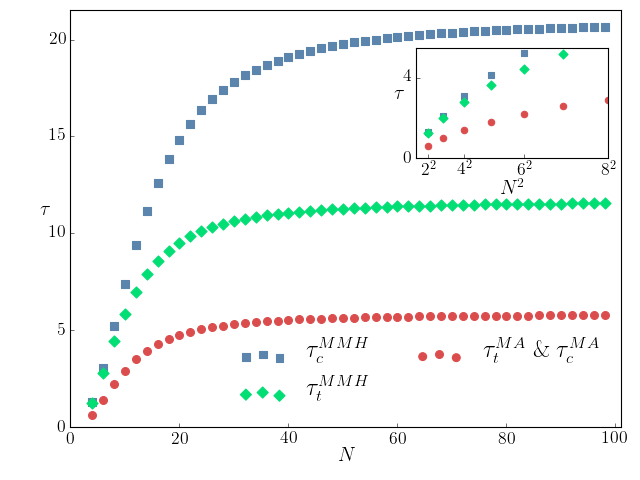

In [57]:
exec(open("fig_settings.py").read())
cross_over = crossover_size([A_c,B_c])
select_points = np.arange(0,len(sizes),2)
N_max = sizes[-1]+1
fig = plt.figure()
ax = fig.add_axes([0.11, 0.11, 0.86, 0.87])
index_relax = 0

ax.scatter(sizes[select_points],data.tau_MM_c[select_points],label=r"$\tau_c^{MMH}$",marker="s",s=ms_size,color=myblue)
fig.show()
ax.scatter(sizes[select_points],data.tau_MM_t[select_points],label=r"$\tau_t^{MMH}$",marker="D",s=ms_size,color=mygreen)
ax.scatter(sizes[select_points],data.tau_MA[select_points],label=r"$\tau_t^{MA}\;\&\;\tau_c^{MA}$",s=ms_size,color=myred)

ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 0 
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
L = np.int(cross_over/2) +2
ax2 = fig.add_axes([0.65, 0.67, 0.3, 0.23])
ax2.scatter(sizes[:L]**2,data.tau_MM_c[:L],marker="s",s=ms_size/1.5,color=myblue)
ax2.scatter(sizes[:L]**2,data.tau_MM_t[:L],marker="D",s=ms_size/1.5,color=mygreen)
ax2.scatter(sizes[:L]**2,data.tau_MA[:L],s=ms_size/1.5,color=myred)
ax2.yaxis.labelpad = 4
ax2.xaxis.labelpad = 1.5
ax2.yaxis.tick_left()
ax2.xaxis.tick_bottom()
ax2.set_xlim([0,np.max(sizes[:L]**2)*1.])
ax2.set_ylim([0,data.tau_MM_c[L-1]*1.05])
ax2.set_xlabel(r'$N^2$')
ax2.set_ylabel(r'$\tau$',rotation=0)
ax2.xaxis.set_ticks(sizes[np.arange(0,L,2,dtype=int)]**2)
ax2.xaxis.set_ticklabels([ r"$%s^2$"%str(x) for x in sizes[np.arange(0,L,2,dtype=int)]])
ax2.yaxis.set_ticks(np.arange(0,data.tau_MM_c[L-1],4,dtype=int))
ax.legend(loc=4,frameon=0,framealpha=0,ncol=2)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\tau$',rotation=0)
vec = np.ravel([data.tau_MA,data.tau_MM_c,data.tau_MM_t])
ylim_up = np.max(vec)*0.93
ylim_up += 0.12*ylim_up
xlim_up = (N_max-1)*1.02
ax.set_xlim([0,xlim_up])
ax.set_ylim([0,ylim_up])
fig.savefig("./figures/relaxation.pdf")

## Plot the lifetimes ##

<IPython.core.display.Javascript object>


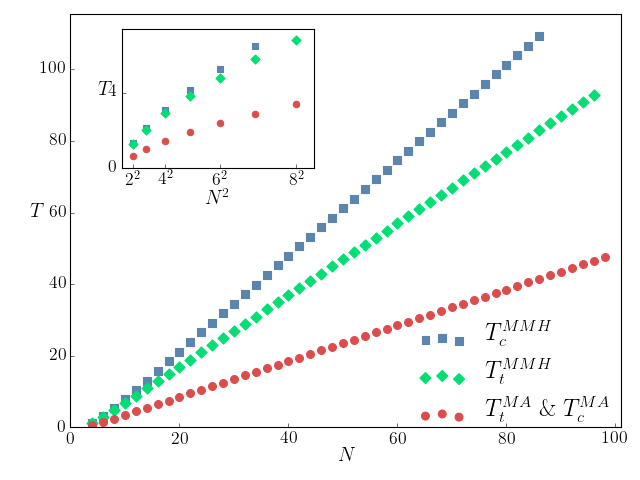

In [77]:
fig2 = plt.figure()
ax = fig2.add_axes([0.11, 0.11, 0.86, 0.86])
index_relax = 1
ax.scatter(sizes[select_points][:-6],data.T_MM_c[select_points][:-6],label=r"$T_c^{MMH}$",marker="s",s=ms_size,color=myblue)
ax.scatter(sizes[select_points][:-1],data.T_MM_t[select_points][:-1],label=r"$T_t^{MMH}$",marker="D",s=ms_size,color=mygreen)
ax.scatter(sizes[select_points],data.T_MA[select_points],label=r"$T_t^{MA}\;\&\;T_c^{MA}$",s=ms_size,color=myred)
ax.yaxis.labelpad = 4
ax.xaxis.labelpad = 0
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax2 = fig2.add_axes([0.19, 0.65, 0.3, 0.29])
ax2.scatter(sizes[:L]**2,data.T_MM_c[:L],marker="s",s=ms_size/1.5,color=myblue)
ax2.scatter(sizes[:L]**2,data.T_MM_t[:L],marker="D",s=ms_size/1.5,color=mygreen)
ax2.scatter(sizes[:L]**2,data.T_MA[:L],s=ms_size/1.5,color=myred)
ax2.yaxis.labelpad = 4
ax2.xaxis.labelpad = 1.5
ax2.yaxis.tick_left()
ax2.xaxis.tick_bottom()
ax2.xaxis.set_ticks(sizes[np.arange(0,L,2,dtype=int)]**2)
ax2.xaxis.set_ticklabels([ r"$%s^2$"%str(x) for x in sizes[np.arange(0,L,2,dtype=int)]])
ax2.yaxis.set_ticks(np.arange(0,data.T_MM_c[L-1],4,dtype=int))
ax2.set_xlim([0,np.max(sizes[:L]**2)*1.1])
ax2.set_ylim([0,data.T_MM_c[L-1]*1.4])
ax2.set_xlabel(r'$N^2$')
ax2.set_ylabel(r'$T$',rotation=0)

ax.legend(bbox_to_anchor=[1.02,0.3],frameon=0,framealpha=0)
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$T$',rotation=0)
vec = np.ravel([data.T_MA,data.T_MM_c,data.T_MM_t])
ylim_up = np.max(vec)*0.85
ylim_up += 0.05*ylim_up
xlim_up = (N_max-1)*1.02
ax.set_xlim([0,xlim_up])
ax.set_ylim([0,ylim_up])
fig2.show()
fig2.savefig("./figures/lifetime.pdf")

